**Sign Language Alphabets**

Sign language is a visual means of communicating through hand signals, gestures, facial expressions, and body language. It’s the main form of communication for the Deaf and Hard-of-Hearing community, but sign language can be useful for other groups of people as well. People with disabilities including Autism, Apraxia of speech, Cerebral Palsy, and Down Syndrome may also find sign language beneficial for communicating.

**ASL - American Sign Language**

American Sign Language (ASL) is a complete, natural language that has the same linguistic properties as spoken languages, with grammar that differs from English. 


ASL is expressed by movements of the hands and face. It is the primary language of many North Americans who are deaf and hard of hearing, and is used by many hearing people as well. 


ASL is used by roughly half a million people in the USA.

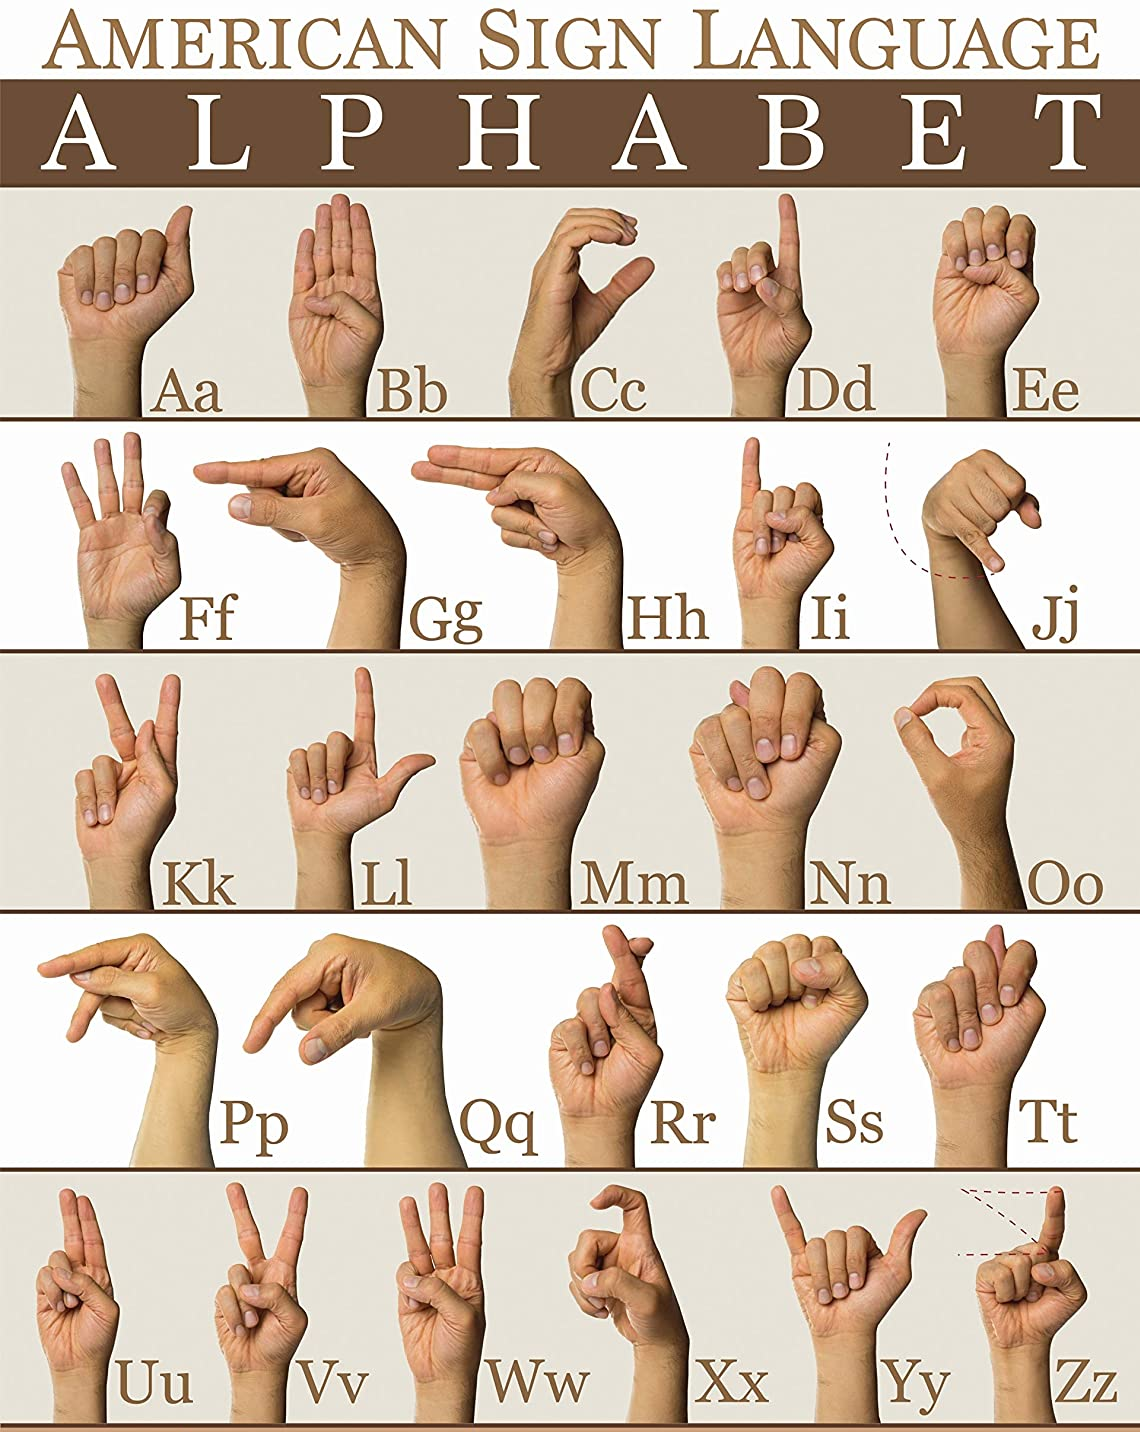

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

In [ ]:
# loading train and data sets
train = pd.read_csv("/content/drive/MyDrive/DL-project/sign_mnist_train.csv", delimiter=',')
test = pd.read_csv("/content/drive/MyDrive/DL-project/sign_mnist_test.csv", delimiter=',')

In [ ]:
# showing first 10 rows of the train dataset
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,202,206,208,212,214,217,219,220,222,226,227,227,228,231,231,231,230,231,233,163,169,171,174,179,185,190,194,198,203,208,...,70,71,73,69,64,56,51,56,41,216,255,255,186,189,191,197,205,211,216,219,232,205,147,137,118,99,79,75,78,77,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,138,139,138,138,139,138,139,139,139,139,138,138,138,137,136,135,134,134,134,139,137,138,139,139,138,140,140,141,142,142,...,79,116,126,121,109,79,70,171,183,179,180,179,173,174,176,177,179,179,179,179,174,179,196,178,160,147,114,94,92,120,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,152,155,162,165,168,177,140,170,181,182,185,188,189,191,192,192,194,195,195,108,40,81,100,105,111,113,145,154,130,160,...,177,220,215,218,220,222,222,224,227,227,227,228,104,108,113,119,128,142,154,213,201,186,172,155,148,129,107,84,154,223,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,191,191,191,191,190,190,189,189,189,189,186,186,185,184,183,182,183,98,60,171,175,179,182,185,187,188,190,193,193,193,...,90,108,120,118,124,123,119,123,121,113,98,67,130,130,130,129,131,124,156,237,230,185,154,161,155,126,110,93,92,119,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,189,188,187,187,186,185,184,184,183,180,180,180,178,179,178,176,174,173,172,189,189,190,192,191,191,192,192,191,190,189,...,32,22,18,21,181,208,201,199,198,199,198,199,210,215,210,94,78,71,81,41,22,45,47,41,39,40,39,39,24,24,13,53,200,204,201,201,193,175,178,156


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27455.0,12.318813,7.287552,0.0,6.0,13.0,19.0,24.0
pixel1,27455.0,145.419377,41.358555,0.0,121.0,150.0,174.0,255.0
pixel2,27455.0,148.500273,39.942152,0.0,126.0,153.0,176.0,255.0
pixel3,27455.0,151.247714,39.056286,0.0,130.0,156.0,178.0,255.0
pixel4,27455.0,153.546531,38.595247,0.0,133.0,158.0,179.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,27455.0,162.736696,63.444008,0.0,125.0,184.0,207.0,255.0
pixel781,27455.0,162.906137,63.509210,0.0,128.0,184.0,207.0,255.0
pixel782,27455.0,161.966454,63.298721,0.0,128.0,182.0,206.0,255.0
pixel783,27455.0,161.137898,63.610415,0.0,128.0,182.0,204.0,255.0


In [ ]:
train.shape

(27455, 785)

In [ ]:
test.shape

(7172, 785)

In [ ]:
labels = train['label'].values

In [ ]:
unique_value = np.array(labels)
np.unique(unique_value)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


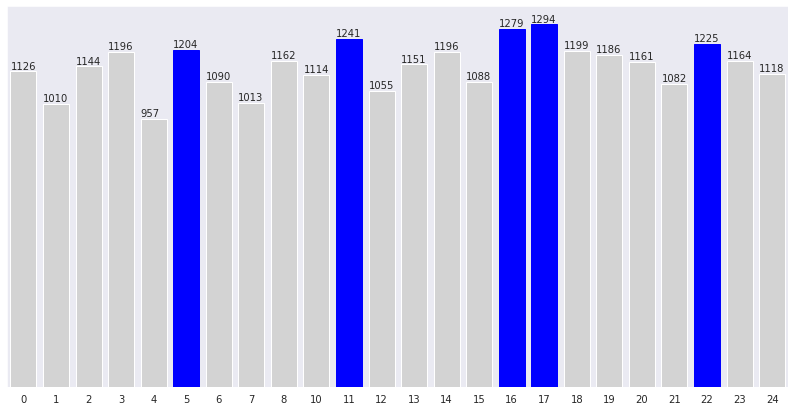

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,7))
g = sns.countplot(train['label'], color='lightgrey')

for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10))
    if p.get_height() > 1200:
        p.set_color('blue')
g.set_ylabel('')    
g.set_xlabel('')
g.axes.get_yaxis().set_visible(False)

In [ ]:
train.drop('label', axis = 1, inplace = True)

**Reshaping the images**

In [ ]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

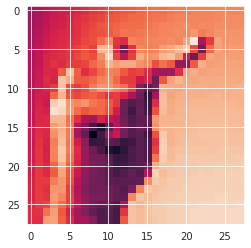

In [ ]:
plt.imshow(images[55].reshape(28,28))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 84)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Creating the batch of 100. Number of epochs set at 20

In [ ]:
batch_size = 100
num_classes = 24
epochs = 20

**Normalization of training and test data**

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Image after normalization

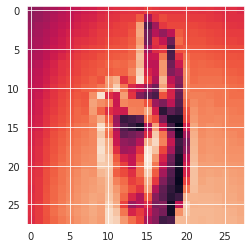

In [ ]:
plt.imshow(x_train[54].reshape(28,28))

CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

Fit and validate the model

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/20
220/220 [==============================] - 3s 9ms/step - loss: 2.9217 - accuracy: 0.1240 - val_loss: 1.2981 - val_accuracy: 0.6055
Epoch 2/20
220/220 [==============================] - 1s 6ms/step - loss: 1.2097 - accuracy: 0.6008 - val_loss: 0.6003 - val_accuracy: 0.8193
Epoch 3/20
220/220 [==============================] - 1s 7ms/step - loss: 0.6248 - accuracy: 0.7873 - val_loss: 0.3295 - val_accuracy: 0.9026
Epoch 4/20
220/220 [==============================] - 1s 6ms/step - loss: 0.3641 - accuracy: 0.8794 - val_loss: 0.1672 - val_accuracy: 0.9526
Epoch 5/20
220/220 [==============================] - 1s 6ms/step - loss: 0.2143 - accuracy: 0.9314 - val_loss: 0.1059 - val_accuracy: 0.9729
Epoch 6/20
220/220 [==============================] - 1s 7ms/step - loss: 0.1405 - accuracy: 0.9559 - val_loss: 0.0580 - val_accuracy: 0.9869
Epoch 7/20
220/220 [==============================] - 1s 6ms/step - loss: 0.0997 - accuracy: 0.9698 - val_loss: 0.0383 - val_accuracy: 0.9938
Epoch 

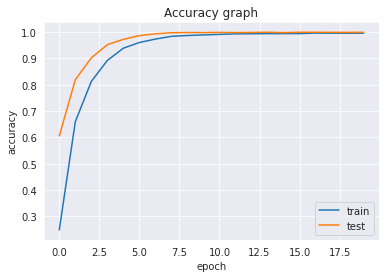

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy graph")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
#test_labels = test['label']
#test.drop('label', axis = 1, inplace = True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

Predicting with images

In [ ]:
y_pred = model.predict(test_images)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.8750697155605132